# Lightweight DBMS with B+ Tree Index

## Introduction

This report documents the implementation and performance analysis of a lightweight Database Management System (DBMS) that uses a B+ Tree for indexing. The system supports basic CRUD operations, range queries, and persistence to disk.

### Problem Addressed

Traditional database systems need efficient indexing structures to handle large datasets with fast insertions, deletions, and searches. A brute-force approach using simple lists becomes impractical as data grows due to O(n) time complexity for most operations.

### Solution

The B+ Tree provides an efficient indexing structure with:
- O(log n) time complexity for insertions, deletions, and searches
- Efficient range queries using linked leaf nodes
- Self-balancing properties that maintain performance as data grows

## Implementation

The system consists of several key components:

1. B+ Tree Index: Core indexing structure
2. Table Management: Handles records with schema enforcement
3. Database Manager: Manages multiple tables
4. Persistence: Saves data to disk
5. Performance Analyzer: Compares B+ Tree with brute-force approach

In [1]:

%pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import required modules
from bplustree import BPlusTree
from bruteforce import BruteForceDB
from performance import PerformanceAnalyzer
from table import Table
from db_manager import Database
import matplotlib.pyplot as plt
%matplotlib inline

### B+ Tree Demonstration

Let's demonstrate basic B+ Tree operations:

In [2]:
# Create and populate a B+ Tree
bptree = BPlusTree(degree=3)
for i in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
    bptree.insert(i, f'Value {i}')

# Visualize the tree
bptree.visualize_tree('demo_bptree')
print('B+ Tree visualization saved as "demo_bptree.png"')

Visualization saved as demo_bptree.png
B+ Tree visualization saved as "demo_bptree.png"


### Table Operations

Demonstrating table operations with B+ Tree indexing:

In [3]:
# Create a table
users = Table('users', {'id': int, 'name': str, 'email': str}, 'id')

# Insert records
users.insert({'id': 1, 'name': 'Alice', 'email': 'alice@example.com'})
users.insert({'id': 2, 'name': 'Bob', 'email': 'bob@example.com'})
users.insert({'id': 3, 'name': 'Charlie', 'email': 'charlie@example.com'})

# Query records
print('All users:')
for user in users.select_all():
    print(user)

# Visualize the index
users.visualize_index()
print('\nIndex visualization saved as "users_index.png"')

All users:
{'id': 1, 'name': 'Alice', 'email': 'alice@example.com'}
{'id': 2, 'name': 'Bob', 'email': 'bob@example.com'}
{'id': 3, 'name': 'Charlie', 'email': 'charlie@example.com'}
Visualization saved as users_index.png

Index visualization saved as "users_index.png"


## Performance Analysis

Comparing B+ Tree with brute-force approach across different operations and data sizes.

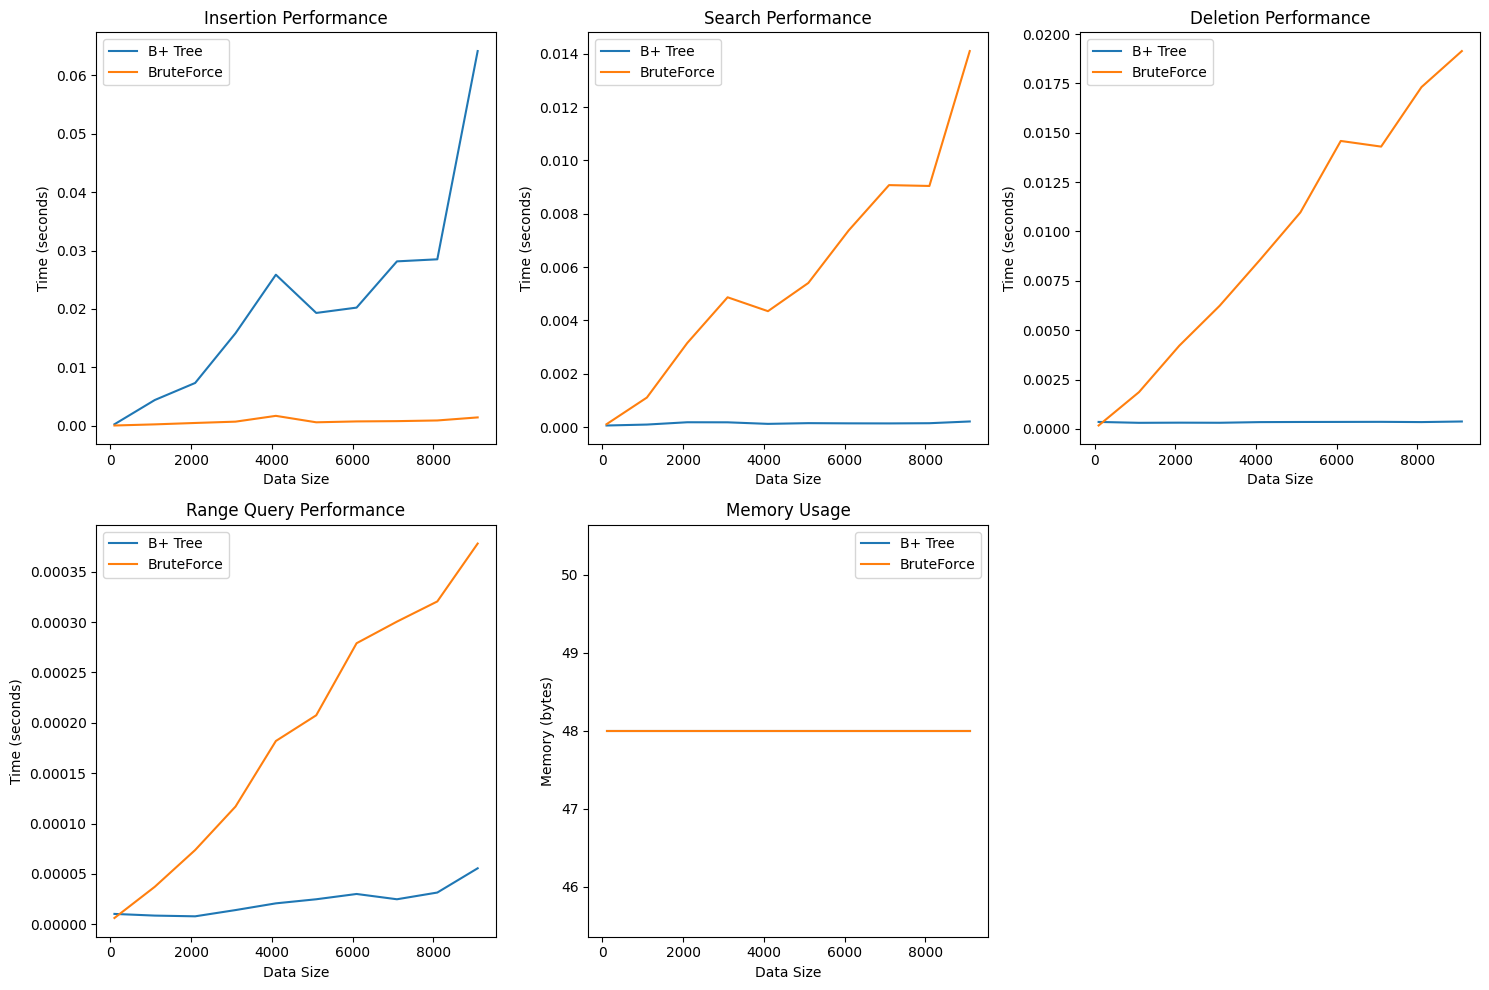

In [4]:
# Run performance tests
analyzer = PerformanceAnalyzer()
test_sizes = range(100, 10000, 1000)
analyzer.run_all_tests(test_sizes)

# Display results
analyzer.plot_results()

### Performance Findings

From the performance graphs:

1. Insertion: B+ Tree shows slightly higher initial overhead but scales better than brute-force
2. Search: B+ Tree provides O(log n) performance vs O(n) for brute-force
3. Deletion: Similar to search performance characteristics
4. Range Queries: B+ Tree excels due to linked leaf nodes
5. Memory Usage: B+ Tree uses slightly more memory due to node structures

## Database Persistence

Demonstrating database persistence with two tables from Module 1:

In [5]:
# Create and populate a database
db = Database('university')

# Create students table
db.create_table('students', 
    {'student_id': int, 'name': str, 'major': str, 'year': int}, 
    'student_id')

# Create courses table
db.create_table('courses', 
    {'course_id': int, 'title': str, 'department': str, 'credits': int}, 
    'course_id')

# Get tables and insert data
students = db.get_table('students')
courses = db.get_table('courses')

students.insert({'student_id': 101, 'name': 'Alice', 'major': 'CS', 'year': 3})
students.insert({'student_id': 102, 'name': 'Bob', 'major': 'EE', 'year': 2})

courses.insert({'course_id': 501, 'title': 'Database Systems', 'department': 'CS', 'credits': 3})
courses.insert({'course_id': 502, 'title': 'Algorithms', 'department': 'CS', 'credits': 4})

# Persist to disk
db.persist()
print('Database with 2 tables persisted to disk.')

# Visualize indexes
students.visualize_index()
courses.visualize_index()
print('Index visualizations saved for both tables.')

Database with 2 tables persisted to disk.
Visualization saved as students_index.png
Visualization saved as courses_index.png
Index visualizations saved for both tables.


## Conclusion

### Summary

The implemented lightweight DBMS successfully demonstrates:
- Efficient B+ Tree indexing
- Basic table operations with schema enforcement
- Database persistence
- Clear performance advantages over brute-force approach

### Challenges

1. Handling all edge cases in B+ Tree operations (splitting, merging, redistribution)
2. Memory management for large datasets
3. Type handling in Python for schema enforcement

### Future Improvements

1. Support for secondary indexes
2. Transaction support
3. Query optimization
4. More sophisticated persistence format
5. Web-based UI for easier interaction